In [1]:
import pandas as pd
from pandas import Series,DataFrame

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('train.csv')

titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


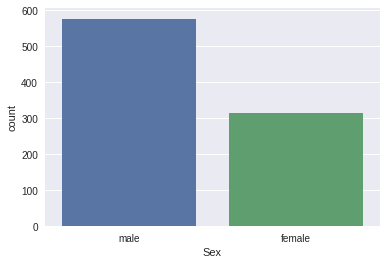

In [3]:
sns.countplot('Sex',data=titanic_df)

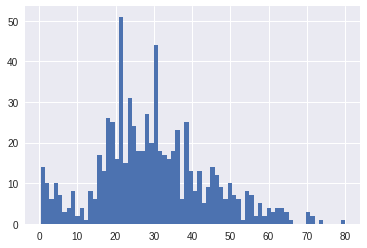

In [4]:
titanic_df['Age'].hist(bins=70)

In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
series_sex = titanic_df.groupby('Sex').size()

In [7]:
series_sex_survived = titanic_df.groupby(['Sex', 'Survived']).size()

In [8]:
dead_rate_male = series_sex_survived['male'][0] / series_sex['male']
dead_rate_female = series_sex_survived['female'][0] / series_sex['female']

In [9]:
dead_rate_female

0.25796178343949044

In [10]:

passenger_over = titanic_df[(titanic_df.Age >= 40)  & (titanic_df.Age < 60)]

In [11]:
len(titanic_df[titanic_df.Survived == 1])

342

In [12]:
survied = titanic_df[titanic_df.Survived == 1]

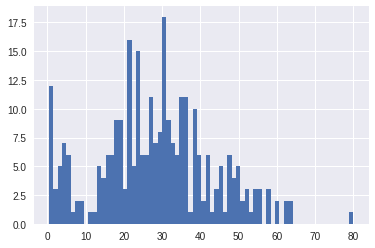

In [13]:
survied['Age'].hist(bins=70)

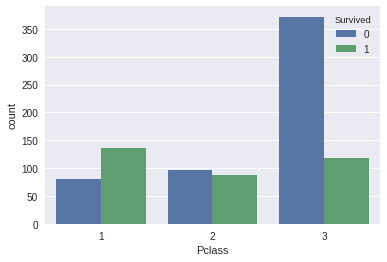

In [14]:
sns.countplot('Pclass',data=titanic_df, hue='Survived')

In [15]:
deck = titanic_df[titanic_df.Cabin.notnull()]

In [16]:
series_sex = deck.groupby(['Sex']).size()

In [17]:
series_sex_survived = deck.groupby(['Sex', 'Survived']).size()

In [18]:
series_sex

Sex
female     97
male      107
dtype: int64

In [19]:
series_sex_survived

Sex     Survived
female  0            6
        1           91
male    0           62
        1           45
dtype: int64

In [20]:
dead_rate_male = series_sex_survived['male'][0] / series_sex['male']
dead_rate_female = series_sex_survived['female'][0] / series_sex['female']

In [21]:
dead_rate_male

0.5794392523364486

In [22]:
dead_rate_female

0.061855670103092786

In [23]:
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp

In [24]:
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 1
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 0

/usr/local/pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


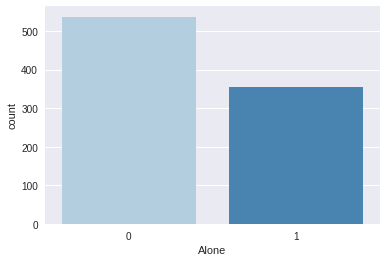

In [25]:
sns.countplot('Alone',data=titanic_df,palette='Blues')

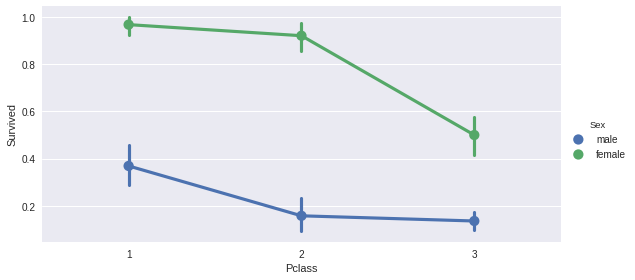

In [6]:
sns.factorplot('Pclass','Survived',hue='Sex',data=titanic_df, order=[1,2,3], aspect=2)

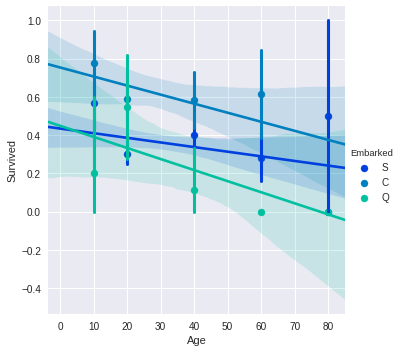

In [7]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Embarked',data=titanic_df,palette='winter',x_bins=generations)

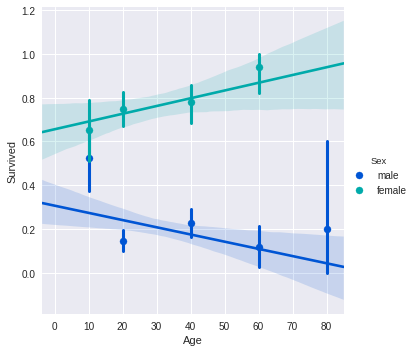

In [8]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

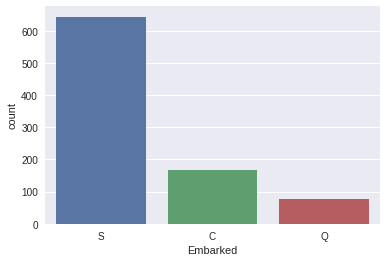

In [36]:
sns.countplot('Embarked',data=titanic_df)

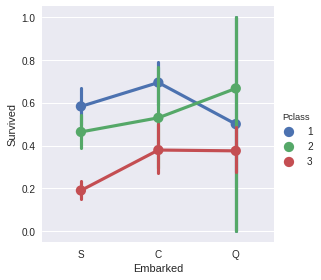

In [39]:
sns.factorplot('Embarked','Survived',data=titanic_df, hue='Pclass')

In [9]:
titanic_df.Age.mean()

29.69911764705882

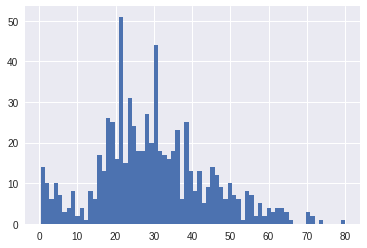

In [10]:
titanic_df.Age.hist(bins=70)

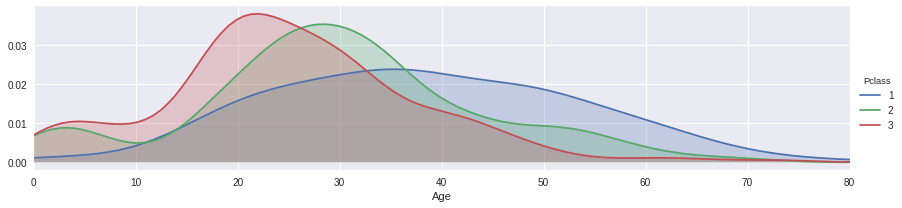

In [17]:
# FacetGridを使うと、複数のカーネル密度推定のグラフを1つのプロットに描くことができます。

# 性別で層別化して、グラフを少し横長に設定します。
fig = sns.FacetGrid(titanic_df, hue="Pclass", aspect=4)

# mapを使って、性別ごとにkdeplotを描くようにします。
fig.map(sns.kdeplot,'Age',shade= True)

# xの最大値を長老に合わせます。
oldest = titanic_df['Age'].max()

# x軸の範囲を設定します。
fig.set(xlim=(0,oldest))

# 凡例を付け加えておきましょう。
fig.add_legend()

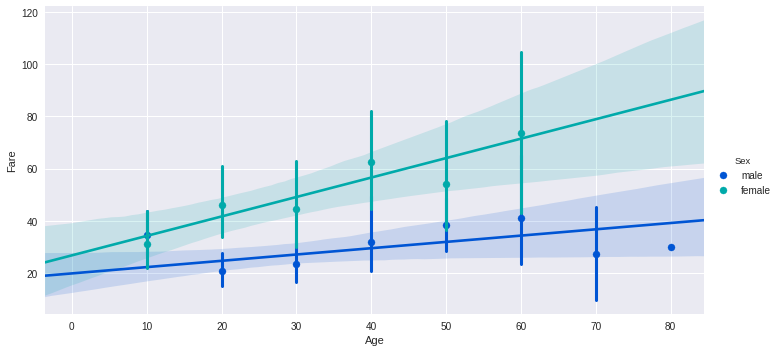

In [27]:
prices = [10,20,30,40,50,60,70,80,90,100]
sns.lmplot('Age','Fare',hue='Sex',data=titanic_df,palette='winter',x_bins=prices, aspect=2)